In [13]:
# Importing the neccessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Load the dataset
winedata = pd.read_csv('D:/data/others/wine.csv')

In [15]:
# separate the  data into feature set and classes
x = winedata.iloc[:,0:13].values
y = winedata.iloc[:,13].values

In [19]:
# Split the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
# Performing preprocessing of the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
# Perform PCA on the training set and test set
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

explained_variance = pca.explained_variance_ratio_

In [25]:
# Fitting a Logistic Regression line to the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# Making Prediction using the Test Set
y_pred = classifier.predict(x_test)

In [29]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

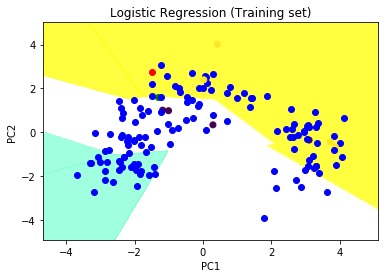

In [35]:
# Predicting the result of the training set
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 1,
                              stop = x_set[:,0].max() + 1, step = 0.01),
                              np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),
                                                x2.ravel()]).T).reshape(x1.shape), alpha = 0.75,
            cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())


for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
#plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 
                   